In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [3]:
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

In [4]:
df.shape

(119390, 32)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
df.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

Warning suppression

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Defining Target and Independent Feature

In [9]:
Y = df[['is_canceled']]
X = df.drop(['is_canceled'], axis=1)

## Get Cancellation Rate

In [10]:
Y.mean()

is_canceled    0.370416
dtype: float64

## Split Featres into Numerical and Categorical

In [11]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [12]:
# check for how many unique values each column has
def unique_levels(x):
    x = x.value_counts().count()
    return x

df_value_counts = pd.DataFrame(num.apply(lambda X: unique_levels(X)))

In [13]:
df_value_counts.columns = ['feature_levels']
df_value_counts.sort_values(by = 'feature_levels', ascending=False)

,feature_levels
adr,8879
lead_time,479
company,352
agent,333
days_in_waiting_list,128
previous_bookings_not_canceled,73
arrival_date_week_number,53
stays_in_week_nights,35
arrival_date_day_of_month,31
booking_changes,21


In [14]:
slice1 = df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list = slice1.index
cat = num.loc[:, cat_list]
cat.dtypes

arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [15]:
slice2 = df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list = slice2.index
num = num.loc[:, num_list]
num.dtypes

lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_week_nights                int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
company                           float64
days_in_waiting_list                int64
adr                               float64
dtype: object

In [16]:
char = pd.concat([char, cat], axis = 1, join = 'inner')

In [17]:
char.dtypes

hotel                           object
arrival_date_month              object
meal                            object
country                         object
market_segment                  object
distribution_channel            object
reserved_room_type              object
assigned_room_type              object
deposit_type                    object
customer_type                   object
reservation_status              object
reservation_status_date         object
arrival_date_year                int64
stays_in_weekend_nights          int64
adults                           int64
children                       float64
babies                           int64
is_repeated_guest                int64
previous_cancellations           int64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

## Outliers Analysis of Numerical Features


In [18]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.90,0.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,2.500302,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122
std,106.863097,13.605138,8.780829,1.908286,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000


In [19]:
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return (x)

In [20]:
num = num.apply(lambda x: outlier_cap(x))

In [21]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.90,0.99])

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,103.409180,27.173943,15.798241,2.479211,0.060273,0.209574,86.008598,189.206373,1.606902,101.461251
std,104.600923,13.588582,8.780829,1.761267,0.376351,0.555245,108.591334,131.297172,9.760268,46.905036
min,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
1%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
5%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000
10%,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000


## Missing Values Analysis

In [22]:
num.isnull().mean()

lead_time                         0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_week_nights              0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
company                           0.943069
days_in_waiting_list              0.000000
adr                               0.000000
dtype: float64

In [23]:
char.isnull().sum()

hotel                            0
arrival_date_month               0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
reserved_room_type               0
assigned_room_type               0
deposit_type                     0
customer_type                    0
reservation_status               0
reservation_status_date          0
arrival_date_year                0
stays_in_weekend_nights          0
adults                           0
children                         4
babies                           0
is_repeated_guest                0
previous_cancellations           0
required_car_parking_spaces      0
total_of_special_requests        0
dtype: int64

## Dropping Variables that have >25% missing values 

In [24]:
num = num.loc[:, num.isnull().mean() <= 0.25 ]

In [25]:
num.isnull().mean()

lead_time                         0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_week_nights              0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
days_in_waiting_list              0.000000
adr                               0.000000
dtype: float64

## Imputation of Missing Values

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1 = pd.DataFrame(imputer.fit_transform(num), index = num.index, columns=num.columns)

In [27]:
num_1.isnull().mean()

lead_time                         0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_week_nights              0.0
previous_bookings_not_canceled    0.0
booking_changes                   0.0
agent                             0.0
days_in_waiting_list              0.0
adr                               0.0
dtype: float64

In [28]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char_1 = pd.DataFrame(imputer.fit_transform(char), index = char.index, columns=char.columns)

In [29]:
char_1.isnull().sum()

hotel                          0
arrival_date_month             0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
assigned_room_type             0
deposit_type                   0
customer_type                  0
reservation_status             0
reservation_status_date        0
arrival_date_year              0
stays_in_weekend_nights        0
adults                         0
children                       0
babies                         0
is_repeated_guest              0
previous_cancellations         0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

## Feature Selection - Numerical Features

## Part 1: Remove Features with Zero Variance

In [30]:
from sklearn.feature_selection import VarianceThreshold
varselector = VarianceThreshold(threshold = 0)
varselector.fit_transform(num_1)

#get column indices to keep and create new df with those columns only
cols = varselector.get_support(indices=True)
num_2 = num_1.iloc[:,cols]

In [31]:
num_2.iloc[0]

lead_time                         342.000000
arrival_date_week_number           27.000000
arrival_date_day_of_month           1.000000
stays_in_week_nights                0.000000
previous_bookings_not_canceled      0.000000
booking_changes                     3.000000
agent                              86.008598
days_in_waiting_list                0.000000
adr                                 0.000000
Name: 0, dtype: float64

## Part 2: Bivariate Analysis (Feature Discretization)

In [32]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_2), index=num_2.index, columns = num_2.columns).add_suffix('_Rank')
num_binned.tail()

,lead_time_Rank,arrival_date_week_number_Rank,arrival_date_day_of_month_Rank,stays_in_week_nights_Rank,previous_bookings_not_canceled_Rank,booking_changes_Rank,agent_Rank,days_in_waiting_list_Rank,adr_Rank
119385,2.0,6.0,9.0,5.0,0.0,0.0,5.0,0.0,5.0
119386,6.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,9.0
119387,3.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0
119388,6.0,6.0,9.0,5.0,0.0,0.0,4.0,0.0,5.0
119389,8.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0


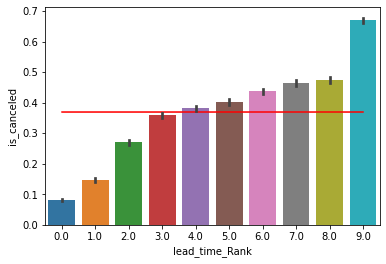

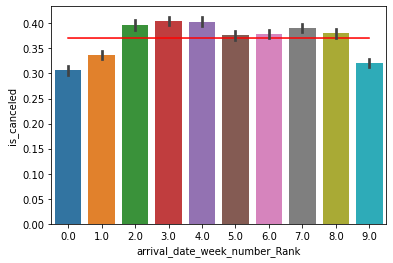

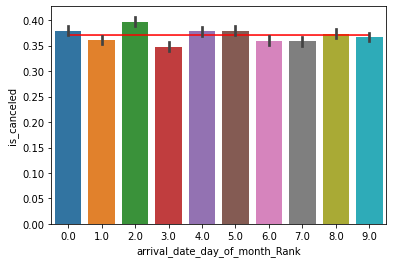

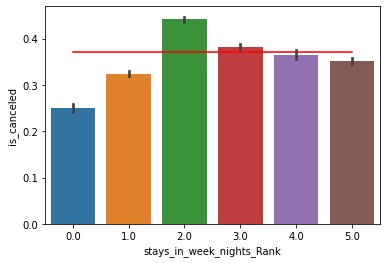

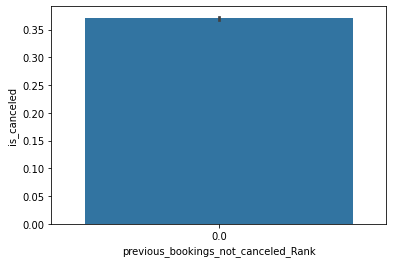

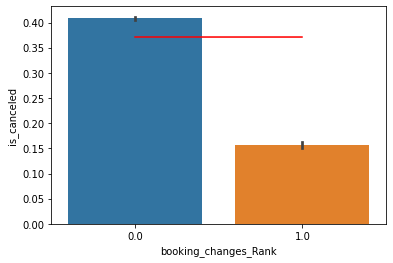

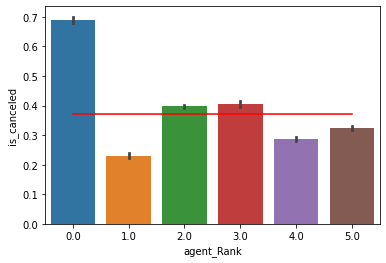

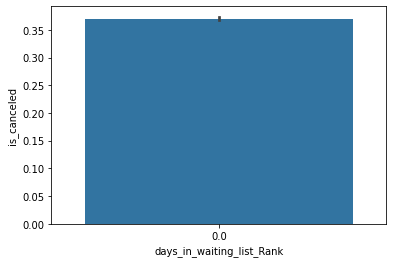

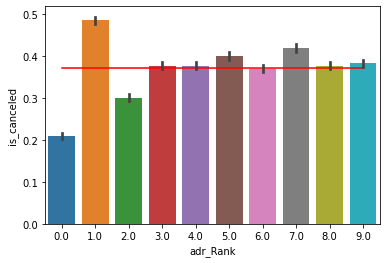

In [33]:
# Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

X_bin_combined = pd.concat([Y,num_binned], axis = 1, join = 'inner')

from numpy import mean
for col in num_binned.columns:
    plt.figure()
    sns.lineplot(x=col, y = X_bin_combined['is_canceled'].mean(), data=X_bin_combined, color='red')
    sns.barplot(x=col, y='is_canceled', data=X_bin_combined, estimator = mean)
plt.show()


In [34]:
num.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_week_nights', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'days_in_waiting_list', 'adr'],
      dtype='object')

In [35]:
# Check the descriptive stats for the following feature
# previous_bookings_not_canceled
# days_in_waiting_list
# booking_changes

num_2['day_wait_ind'] = np.where(num_2['days_in_waiting_list']>0, 1, 0)
num_2['previous_bookings_not_canceled_ind'] = np.where(num_2['previous_bookings_not_canceled']>0, 1, 0)
num_2['booking_changes_ind'] = np.where(num_2['booking_changes']<0, 1, 0)

In [36]:
num_varlist = ['arrival_date_day_of_month', 'arrival_date_week_number', 'days_in_waiting_list', 'previous_bookings_not_canceled', 
               'booking_changes']

num_2 = num_2.drop(num_varlist, axis=1)

In [37]:
num_2.dtypes

lead_time                             float64
stays_in_week_nights                  float64
agent                                 float64
adr                                   float64
day_wait_ind                            int64
previous_bookings_not_canceled_ind      int64
booking_changes_ind                     int64
dtype: object

## Part 3 - Select K Best

In [38]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=4)
selector.fit_transform(num_2, Y)

#get columns to create new df with them only
cols = selector.get_support(indices=True)
select_features_df_num = num_2.iloc[:,cols]

In [39]:
select_features_df_num.iloc[0]

lead_time                             342.000000
agent                                  86.008598
adr                                     0.000000
previous_bookings_not_canceled_ind      0.000000
Name: 0, dtype: float64

## Feature Selection - Categorical Features

In [40]:
#checking for level of each values
char_1.nunique()

hotel                            2
arrival_date_month              12
meal                             5
country                        177
market_segment                   8
distribution_channel             5
reserved_room_type              10
assigned_room_type              12
deposit_type                     3
customer_type                    4
reservation_status               3
reservation_status_date        926
arrival_date_year                3
stays_in_weekend_nights         17
adults                          14
children                         5
babies                           5
is_repeated_guest                2
previous_cancellations          15
required_car_parking_spaces      5
total_of_special_requests        6
dtype: int64

## Part 1 - Bi Variate Analysis

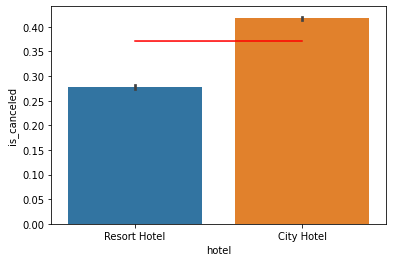

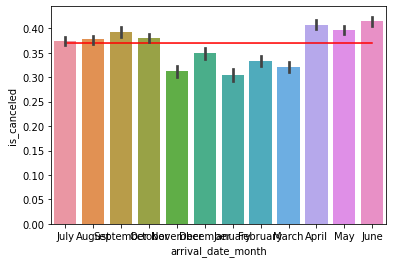

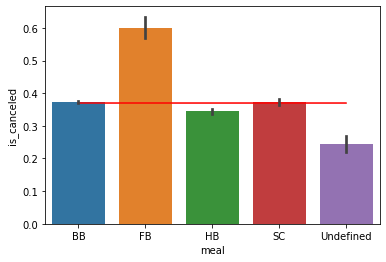

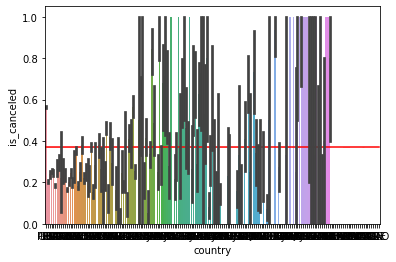

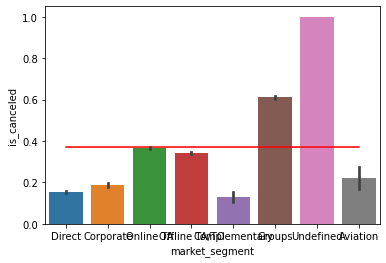

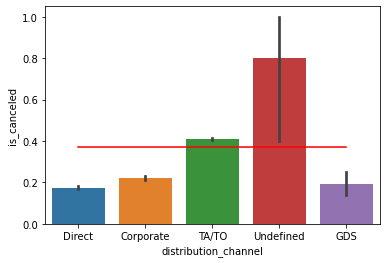

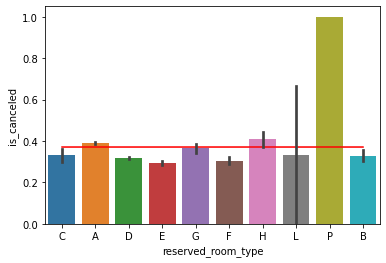

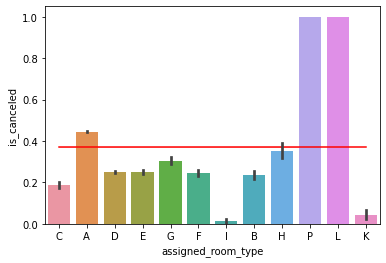

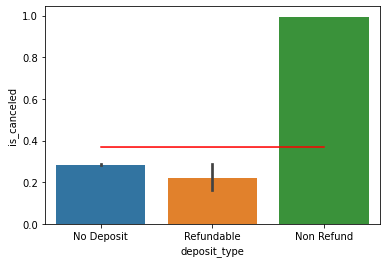

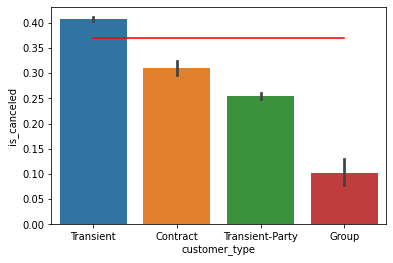

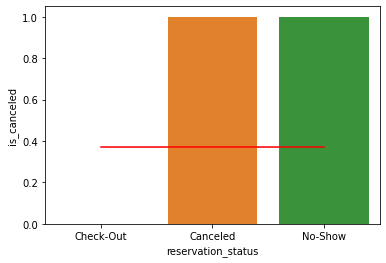

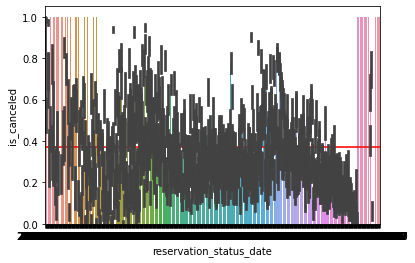

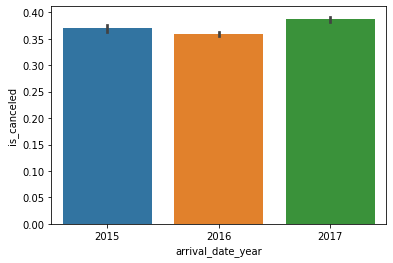

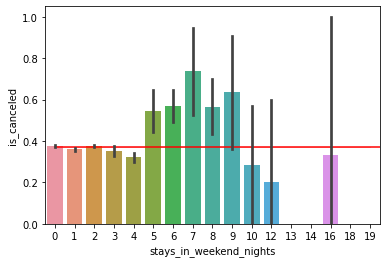

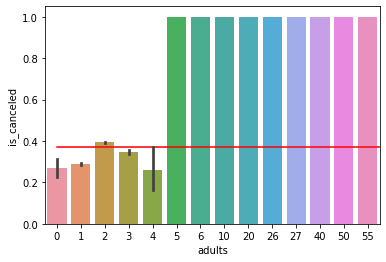

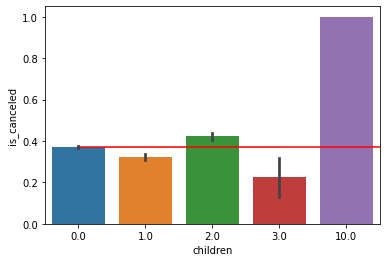

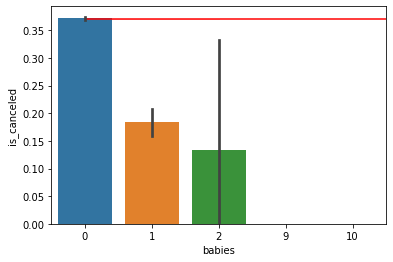

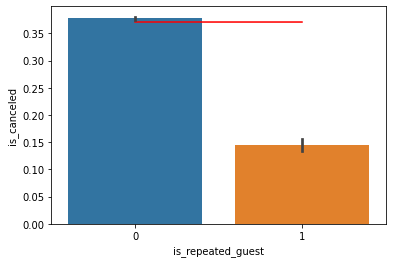

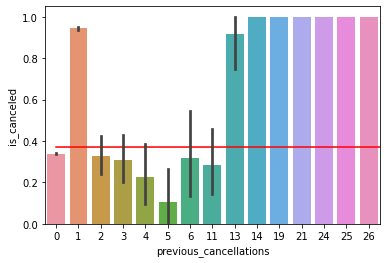

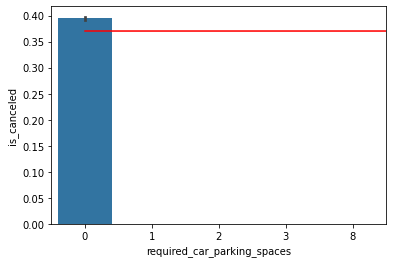

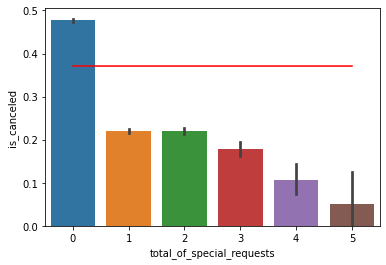

In [41]:
X_char_merged = pd.concat([Y,char_1], axis=1, join='inner')

for col in char.columns:
    plt.figure()
    sns.lineplot(x=col, y = X_char_merged['is_canceled'].mean(), data=X_char_merged, color='red')
    sns.barplot(x=col, y='is_canceled', data = X_char_merged, estimator=mean)
plt.show()

In [42]:
charlist = ['arrival_date_month', 'country', 'assigned_room_type', 'reservation_status',
            'reservation_status_date', 'arrival_date_year']
char_1 = char_1.drop(charlist, axis=1)

In [43]:
char_1.dtypes

hotel                          object
meal                           object
market_segment                 object
distribution_channel           object
reserved_room_type             object
deposit_type                   object
customer_type                  object
stays_in_weekend_nights        object
adults                         object
children                       object
babies                         object
is_repeated_guest              object
previous_cancellations         object
required_car_parking_spaces    object
total_of_special_requests      object
dtype: object

In [44]:
# create dummy features with n-1 variables
X_char_dum = pd.get_dummies(char_1, drop_first=True)
X_char_dum.shape

(119390, 91)

## Part 2 - Select K Best

In [45]:
selector = SelectKBest(chi2, k=30)
selector.fit_transform(X_char_dum, Y)

#get columns to create new df with them only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

## Creating the Master Feature Set for Model Development

In [46]:
X_all = pd.concat([select_features_df_char, select_features_df_num], axis=1, join='inner')

## Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [48]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Attrition Rate in Training Data",y_train.mean())
print("Attrition Rate in Testing Data",y_test.mean())

Shape of Training Data (83573, 34)
Shape of Testing Data (35817, 34)
Attrition Rate in Training Data is_canceled    0.370443
dtype: float64
Attrition Rate in Testing Data is_canceled    0.370355
dtype: float64


## Building Models

In [49]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 20)

In [50]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3,5,6,7], 'min_samples_split': [140,280,420,560,700]}
tree_grid = GridSearchCV(dtree, param_grid = param_dist, cv = 10, n_jobs = -1 )
tree_grid.fit(X_train, y_train)
print('Best Parameters using Grid Search: \n', tree_grid.best_params_)

Best Parameters using Grid Search: 
 {'max_depth': 7, 'min_samples_split': 140}


In [51]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 7, min_samples_split=140)
dtree.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=7, min_samples_split=140, random_state=0)

In [52]:
#building a random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'gini', random_state = 0, max_depth = 7, min_samples_split=140)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=7, min_samples_split=140, random_state=0)

In [53]:
# Model Evaluation
y_pred_tree = dtree.predict(X_test) 
y_pred_rf = rf.predict(X_test) 

In [54]:
# metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [55]:
print('Decision Tree Metrics ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Decision Tree Metrics 
Accuracy: 0.769076137029902
Precision 0.9962241653418124
Recall 0.3779117979645684
f1_score 0.5479586817511067


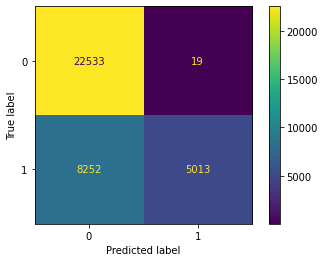

In [56]:
metrics.plot_confusion_matrix(dtree, X_test, y_test)

In [57]:
print('Random Forest Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))
print('Precision:', metrics.precision_score(y_test, y_pred_rf))
print('Recall:', metrics.recall_score(y_test, y_pred_rf))
print('f1_score:', metrics.f1_score(y_test, y_pred_rf))

Random Forest Metrics
Accuracy: 0.7692994946533769
Precision: 0.9968216130313866
Recall: 0.37828872973991706
f1_score: 0.5484452702333461


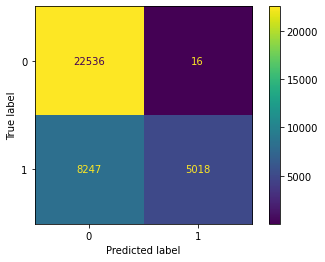

In [58]:
metrics.plot_confusion_matrix(rf, X_test,y_test)

## Probability Decile Analysis

In [59]:
y_pred_prob = rf.predict_proba(X_all)[:,1] # here we choose col 1 cause it has prob of attrition data col 0 is not attrition
df['y_pred_p'] = pd.DataFrame(y_pred_prob)
df['P_Rank_rf'] = pd.qcut(df['y_pred_p'].rank(method = 'first').values,10,duplicates='drop').codes+1
rank_df_actuals = df.groupby('P_Rank_rf')['is_canceled'].agg(['count', 'mean'])
rank_df_actuals = pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)

sorted_rank_df=rank_df_actuals.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df_actuals['count']*rank_df_actuals['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Decile,Lift_over_Avg
0,10,11939,1.000000,11939.0,11939.0,0.269967,0.269967,0.0,0.0,0.000000,0.000000,0.2700,1,2.699665
1,9,11939,0.834827,9967.0,21906.0,0.225375,0.495342,1972.0,1972.0,0.026235,0.026235,0.4691,2,2.253754
2,8,11939,0.518050,6185.0,28091.0,0.139856,0.635198,5754.0,7726.0,0.076551,0.102786,0.5324,3,1.398562
3,7,11939,0.398610,4759.0,32850.0,0.107611,0.742809,7180.0,14906.0,0.095522,0.198308,0.5445,4,1.076113
4,6,11939,0.275400,3288.0,36138.0,0.074349,0.817158,8651.0,23557.0,0.115092,0.313400,0.5038,5,0.743488
5,5,11939,0.259067,3093.0,39231.0,0.069939,0.887098,8846.0,32403.0,0.117686,0.431086,0.4560,6,0.699394
6,4,11939,0.196750,2349.0,41580.0,0.053116,0.940213,9590.0,41993.0,0.127584,0.558670,0.3815,7,0.531160
7,3,11939,0.118435,1414.0,42994.0,0.031974,0.972187,10525.0,52518.0,0.140023,0.698694,0.2735,8,0.319736
8,2,11939,0.075718,904.0,43898.0,0.020441,0.992628,11035.0,63553.0,0.146808,0.845502,0.1471,9,0.204414
9,1,11939,0.027305,326.0,44224.0,0.007372,1.000000,11613.0,75166.0,0.154498,1.000000,0.0000,10,0.073716


* Gain Chart
Gain at a given decile level is the ratio of cumulative number of targets (events) up to that decile to the total number of targets (events) in the entire data set
% of targets (events) covered at a given decile level. For example, 80% of targets covered in top 20% of data based on model. In the case of propensity to buy model, we can say we can identify and target 80% of customers who are likely to buy the product by just sending email to 20% of total customers.

* Lift Chart
It measures how much better one can expect to do with the predictive model comparing without a model. It is the ratio of gain % to the random expectation % at a given decile level. The random expectation at the xth decile is x%.

Ex: The Cum Lift of 4.03 for top two deciles, means that when selecting 20% of the records based on the model, one can expect 4.03 times the total number of targets (events) found by randomly selecting 20%-of-file without a model.

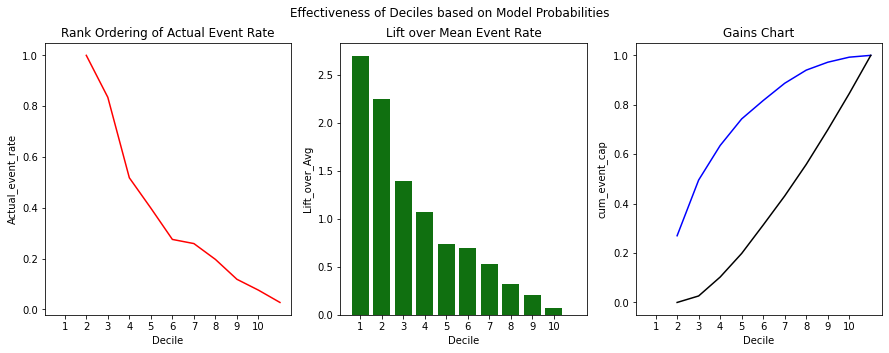

In [60]:
fig, axes = plt.subplots(1, 3, sharex = True, figsize = (15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0], x = 'Decile', y = 'Actual_event_rate', data = sorted_reindexed, color = 'red')
sns.barplot(ax=axes[1], x = 'Decile', y = 'Lift_over_Avg', data = sorted_reindexed, color = 'green')
sns.lineplot(ax=axes[2], x = 'Decile', y = 'cum_event_cap', data = sorted_reindexed, color = 'blue')
sns.lineplot(ax=axes[2], x = 'Decile', y = 'cum_non_event_cap', data = sorted_reindexed, color = 'black')
plt.show()

## Strategy using Machine Learning


In [61]:
df['Predicted_cancel_Rank'] = np.where(df['P_Rank_rf']<8, 'Bottom7', 'Top3')
df['Predicted_cancel_Rank'].value_counts()

Bottom7    83573
Top3       35817
Name: Predicted_cancel_Rank, dtype: int64

In [62]:
df_top3 = df.loc[df['Predicted_cancel_Rank']=='Top3', :]

In [63]:
df_top3.shape

(35817, 35)


#### As we can see we the top 3 Decile(count=35817), accounts for nearly 70% of cancellation.
#### So those users should be our top priority in building any strategy regarding services and offers